# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import csv
import datetime
import time
from citipy import citipy
import random
from scipy.stats import linregress

# Google API Key
from api_keys import g_key

#random.seed(333)

## Generate Cities List

In [2]:
# Setup the ranges for latitude and longitude
latitude_range = (-90,90)
longatude_range = (-180,180)

# Create variables for data
cities = []

no_cities = 2000
for cntr in range(no_cities):
    latitude = random.uniform(latitude_range[0],latitude_range[1])
    longitude = random.uniform(longatude_range[0],longatude_range[1])
    
    # If we have chosen a latitude of 0 then we don't want to use that
    # one
    if latitude != 0:
        city = citipy.nearest_city(latitude,longitude)
        city_name = city.city_name
        city_country = city.country_code
        if not any(c['name'] == city_name and c['country'] == city_country for c in cities):
            city_dict = {'name': city_name,'country': city_country}
            cities.append(city_dict)

In [3]:
print(cities)

[{'name': 'dikson', 'country': 'ru'}, {'name': 'codrington', 'country': 'ag'}, {'name': 'cabo san lucas', 'country': 'mx'}, {'name': 'mar del plata', 'country': 'ar'}, {'name': 'podujevo', 'country': 'rs'}, {'name': 'puntarenas', 'country': 'cr'}, {'name': 'samusu', 'country': 'ws'}, {'name': 'jamestown', 'country': 'sh'}, {'name': 'mys shmidta', 'country': 'ru'}, {'name': 'sinnar', 'country': 'sd'}, {'name': 'arraial do cabo', 'country': 'br'}, {'name': 'rikitea', 'country': 'pf'}, {'name': 'verkhnevilyuysk', 'country': 'ru'}, {'name': 'albany', 'country': 'au'}, {'name': 'yellowknife', 'country': 'ca'}, {'name': 'kapaa', 'country': 'us'}, {'name': 'illoqqortoormiut', 'country': 'gl'}, {'name': 'enkoping', 'country': 'se'}, {'name': 'caravelas', 'country': 'br'}, {'name': 'atar', 'country': 'mr'}, {'name': 'marang', 'country': 'my'}, {'name': 'port alfred', 'country': 'za'}, {'name': 'monrovia', 'country': 'lr'}, {'name': 'acapulco', 'country': 'mx'}, {'name': 'bethel', 'country': 'us

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_id = []
city_name = []
city_cloudiness = []
city_country = []
city_date = []
city_humidity = []
city_latitude = []
city_longitude = []
city_temperature = []
city_wind_speed = []


# Build partial query URL
query_url = f"{base_url}appid={g_key}&units={units}&q="

city_cntr = -1
no_cities_to_retrieve = 525


# Loop through cities
for index, city in enumerate(cities):
    # See if we need to sleep so we don't go over our 60 a minute max for the api
    q, mod = divmod(index+1,55)
    if mod == 0:
        print("Pausing for a minute so we don't over the api calls per minute limit!")
        time.sleep(60)
    
    
    
    # Retrieve data information
    try:
        city_json = requests.get(query_url + city['name'] + ', ' + city['country']).json()
    except:
        print(f"City not found - {city['name']}, {city['country']} - skipping")

    if city_json['cod'] == 200:
        city_cntr += 1
        print(f"Retrieved data for {city_cntr}-{city_json['name']}, {city_json['sys']['country']} ({city_json['coord']['lat']},{city_json['coord']['lon']})")
        
        city_id.append(city_cntr)
        city_name.append(city_json['name'])
        city_cloudiness.append(city_json['clouds']['all'])
        city_country.append(city_json['sys']['country'])
        city_date.append(city_json['dt'])
        city_humidity.append(city_json['main']['humidity'])
        city_latitude.append(city_json['coord']['lat'])
        city_longitude.append(city_json['coord']['lon'])
        city_temperature.append(city_json['main']['temp_max'])              
        city_wind_speed.append(city_json['wind']['speed'])
    
    if city_cntr+1 == no_cities_to_retrieve:
        break
    
          

Retrieved data for 0-Dikson, RU (73.51,80.55)
Retrieved data for 1-Cabo San Lucas, MX (22.89,-109.91)
Retrieved data for 2-Mar del Plata, AR (-38,-57.56)
Retrieved data for 3-Puntarenas, CR (9.98,-84.84)
Retrieved data for 4-Jamestown, SH (-15.94,-5.72)
Retrieved data for 5-Sennar, SD (13.57,33.57)
Retrieved data for 6-Arraial do Cabo, BR (-22.97,-42.03)
Retrieved data for 7-Rikitea, PF (-23.12,-134.97)
Retrieved data for 8-Verkhnevilyuysk, RU (63.45,120.32)
Retrieved data for 9-Albany, AU (-35.02,117.89)
Retrieved data for 10-Yellowknife, CA (62.46,-114.35)
Retrieved data for 11-Kapaa, US (22.08,-159.32)
Retrieved data for 12-Enköping, SE (59.64,17.08)
Retrieved data for 13-Caravelas, BR (-17.71,-39.25)
Retrieved data for 14-Atar, MR (20.52,-13.05)
Retrieved data for 15-Marang, MY (5.21,103.21)
Retrieved data for 16-Port Alfred, ZA (-33.59,26.89)
Retrieved data for 17-Monrovia, LR (6.3,-10.8)
Retrieved data for 18-Acapulco de Juárez, MX (16.86,-99.89)
Retrieved data for 19-Bethel, US 

Retrieved data for 160-Pevek, RU (69.7,170.31)
Retrieved data for 161-Geraldton, AU (-28.77,114.6)
Retrieved data for 162-Leshukonskoye, RU (64.9,45.76)
Retrieved data for 163-Fort Nelson, CA (58.81,-122.7)
Retrieved data for 164-Sioux Lookout, CA (50.1,-91.92)
Retrieved data for 165-Okhotsk, RU (59.38,143.3)
Retrieved data for 166-Nanortalik, GL (60.14,-45.24)
Retrieved data for 167-Grand Forks, CA (49.03,-118.44)
Retrieved data for 168-San Cristobal, EC (-0.9,-89.62)
Retrieved data for 169-Nador, MA (35.17,-2.93)
Retrieved data for 170-Lodja, CD (-3.48,23.43)
Retrieved data for 171-São Filipe, CV (14.9,-24.5)
Retrieved data for 172-Hīt, IQ (33.64,42.83)
Retrieved data for 173-Padang, ID (-0.95,100.35)
Retrieved data for 174-Myślenice, PL (49.83,19.94)
Retrieved data for 175-Aklavik, CA (68.22,-135.01)
Retrieved data for 176-Kristiansund, NO (63.11,7.73)
Retrieved data for 177-Provideniya, RU (64.38,-173.3)
Retrieved data for 178-Sobolevo, RU (54.43,31.9)
Retrieved data for 179-Port B

Retrieved data for 317-Manoel Urbano, BR (-8.84,-69.26)
Retrieved data for 318-Gazli, UZ (40.13,63.45)
Retrieved data for 319-Grivenskaya, RU (45.65,38.18)
Retrieved data for 320-Zhigansk, RU (66.77,123.37)
Retrieved data for 321-Menongue, AO (-14.66,17.69)
Retrieved data for 322-Camaná, PE (-16.62,-72.71)
Retrieved data for 323-Vammala, FI (61.33,22.9)
Retrieved data for 324-Te Anau, NZ (-45.42,167.72)
Retrieved data for 325-Naze, JP (28.37,129.48)
Retrieved data for 326-Northam, AU (-31.67,116.67)
Retrieved data for 327-Santander Jiménez, MX (24.22,-98.47)
Retrieved data for 328-Topaowan, CN (30.67,112.69)
Retrieved data for 329-Gibsons, CA (49.4,-123.5)
Retrieved data for 330-Orativ, UA (49.19,29.53)
Retrieved data for 331-Kupang, ID (-10.17,123.58)
Retrieved data for 332-Okha, RU (53.57,142.95)
Retrieved data for 333-Kaohsiung City, TW (22.62,120.31)
Retrieved data for 334-Klaksvík, FO (62.23,-6.59)
Retrieved data for 335-Kismayo, SO (-0.36,42.55)
Retrieved data for 336-Muli, MV (2

Retrieved data for 477-Urdoma, RU (61.75,48.54)
Retrieved data for 478-Fazilka, IN (30.4,74.03)
Retrieved data for 479-Wągrowiec, PL (52.81,17.2)
Retrieved data for 480-Vostok, RU (46.49,135.88)
Retrieved data for 481-Vardø, NO (70.37,31.11)
Retrieved data for 482-Guerrero Negro, MX (27.98,-114.06)
Retrieved data for 483-São Mateus do Sul, BR (-25.87,-50.38)
Retrieved data for 484-La Ronge, CA (55.1,-105.28)
Retrieved data for 485-Chicama, PE (-7.84,-79.15)
Retrieved data for 486-Narsaq, GL (60.92,-46.05)
Retrieved data for 487-Padrauna, IN (26.9,83.98)
Retrieved data for 488-Mlonggo, ID (-6.53,110.7)
Retrieved data for 489-Nizhniy Odes, RU (63.64,54.86)
Retrieved data for 490-Wilkes-Barre, US (41.25,-75.88)
Retrieved data for 491-Puqi, CN (29.72,113.88)
Retrieved data for 492-Bealanana, MG (-14.55,48.73)
Retrieved data for 493-Bow Island, CA (49.87,-111.37)
Pausing for a minute so we don't over the api calls per minute limit!
Retrieved data for 494-Mehamn, NO (71.04,27.85)
Retrieved d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a DataFrame with the following columns:
# City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
city_data = {
             "City ID": city_id,
             "City": city_name,
             "Cloudiness": city_cloudiness,
             "Country": city_country,    
             "Date": city_date,
             "Humidity": city_humidity,
             "Lat": city_latitude,
             "Lng": city_longitude,
             "Max Temp": city_temperature,
             "Wind Speed": city_wind_speed
            }

city_df = pd.DataFrame(city_data)
city_df.set_index('City ID', inplace = True)

# Write the cities.csv file
csv_file_name = "../output_data/cities.csv"

city_df.to_csv(csv_file_name)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Get rid of any cities that have a humitidy greater than 100
cleaned_city_df = city_df[city_df['Humidity'] <= 100]

# Preview the cleaned data
cleaned_city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Dikson,98,RU,1603137316,95,73.51,80.55,23.77,17.83
1,Cabo San Lucas,5,MX,1603136926,66,22.89,-109.91,91.99,4.70
2,Mar del Plata,98,AR,1603137015,39,-38.00,-57.56,62.60,14.99
3,Puntarenas,75,CR,1603137665,74,9.98,-84.84,78.80,11.41
4,Jamestown,0,SH,1603137124,97,-15.94,-5.72,61.99,21.68
...,...,...,...,...,...,...,...,...,...
520,Domingos Martins,75,BR,1603138310,78,-20.36,-40.66,75.20,6.93
521,Dawson Creek,100,CA,1603138310,89,55.77,-120.24,28.89,7.43
522,Ciudad Bolivar,90,VE,1603138310,39,8.12,-63.55,94.55,5.23


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
# Create a variable to store today's date
today = datetime.datetime.now().strftime('%m/%d/%Y')

In [8]:
def setup_labels(compare_what):
    # Setup Labels and annotate positions
    if compare_what == 'Max Temp':
        plot_label = 'Maximum Temperature'
        y_label = "Maximum Temperature (F)"
        northern_annotate = (20,20)
        southern_annotate = (-30,50)
    elif compare_what == "Humidity":
        plot_label = "Humidity"
        y_label = "Humidity (%)"
        northern_annotate = (20,20)
        southern_annotate = (-40,40)        
    elif compare_what == "Cloudiness":
        plot_label = "Cloudiness"
        y_label = 'Cloudiness (%)'
        northern_annotate = (20,20)
        southern_annotate = (-40,80)         
    else:
        plot_label = "Wind Speed"
        y_label = "Wind Speed (mph)"
        northern_annotate = (30,14)
        southern_annotate = (-40,20)
    return plot_label,y_label,northern_annotate,southern_annotate

In [16]:
def city_plot(df,compare_what):
    
    # Setup the x and y axis
    x_axis = df['Lat']
    y_axis = df[compare_what]

    (plot_label, y_label, northern_annotate, southern_annotate) = setup_labels(compare_what)
    
    # Create the scatter plot
    plt.scatter(x_axis, y_axis)

    # Setup the title and labels
    plt.title(f'City Latitude vs. {plot_label} ({today})', fontsize=12)
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel(f'{y_label}', fontsize=12)
    plt.grid(True)

    
    # Show the scatter plot
    plt.show()
    # Save the plot
    compare_what_no_space = compare_what.replace(' ' ,'_')
    output_file = f'../output_data/city_{compare_what_no_space}.png'
    plt.savefig(output_file)


## Latitude vs. Temperature Plot

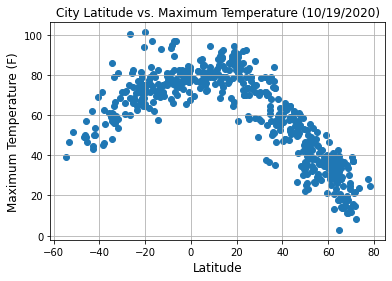

In [17]:
city_plot(cleaned_city_df,'Max Temp')

# Observation for Latitude vs Temperature
The further someone is away to the south from the equator the lower the temperature.   And conversely the further north from the equator the higher the temperature.

## Latitude vs. Humidity Plot

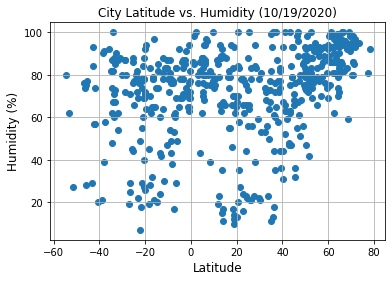

In [18]:
city_plot(cleaned_city_df,'Humidity')

# Observation for Humidity
There are quite a few points where the humitity is higher for both south of the equator and north of the equator but there are also quite a few points that do not exhibit this behavior.  So any correlection would be moderate or weak.

## Latitude vs. Cloudiness Plot

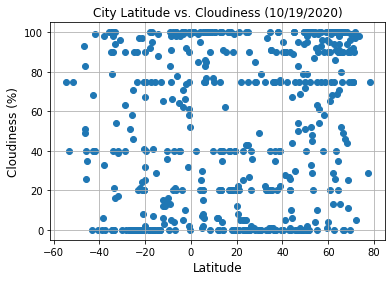

In [19]:
city_plot(cleaned_city_df,'Cloudiness')

# Observation for Cloudiness
The points are distributed over the entire graph.  Therefore there would be no or very weak correletion between latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

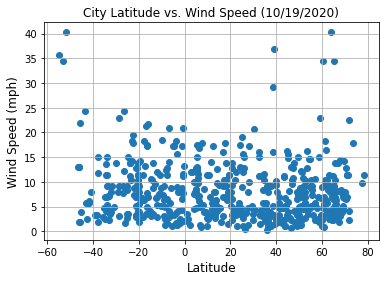

In [20]:
city_plot(cleaned_city_df,'Wind Speed')

# Observations for Wind Speed
There is not any correletion between Wind Speed and Latitude.   Most of the points are less than 20 mph with very few outliers.

## Linear Regression

In [31]:
def linear_regress(df,compare_what,hemisphere):
    
    # Restrict to our requested hemisphere
    if hemisphere == 'Southern':
        hemisphere_df = df.loc[df['Lat'] < 0]
    else:
        hemisphere_df = df.loc[df['Lat'] > 0]
    
    # Set the x and y axis
    x_axis = hemisphere_df['Lat']
    y_axis =hemisphere_df[compare_what]

    # Perform the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    # Setup labels
    (plot_label, y_label, northern_annotate, southern_annotate) = setup_labels(compare_what)
    
    # Output the R value
    print(f"The R-Value between Latitude and {compare_what} is {round(rvalue,2)} for the {hemisphere} Hemisphere")

    # Get the regress values
    regress_values = x_axis * slope + intercept

    # Setup the line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Generate the scatter plot for the line regression
    plt.scatter(x_axis,y_axis)

    # Inclue the line
    plt.plot(x_axis,regress_values,"r-")

    #plt.figure(figsize=(10,10))
    # Setup the labels and title
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(f'City Latitude vs {plot_label} ({today})', fontsize=12)

    # Add the line equation
    if hemisphere == "Northern":
        plt.annotate(line_eq,(northern_annotate),fontsize=15,color="red")
    else:
        plt.annotate(line_eq,(southern_annotate),fontsize=15,color="red")

    # Save the plot
    compare_what_no_space = compare_what.replace(' ' ,'_')
    output_file = f'../output_data/{hemisphere}_Hemisphere_{compare_what_no_space}.png'
    plt.savefig(output_file)        
      
    # Show the chart
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Value between Latitude and Max Temp is -0.91 for the Northern Hemisphere


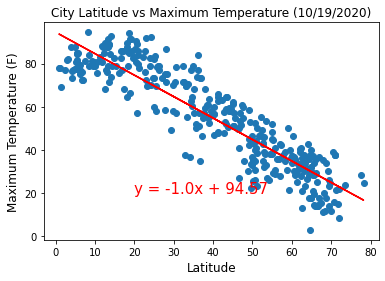

In [32]:
linear_regress(cleaned_city_df,'Max Temp','Northern')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Value between Latitude and Max Temp is 0.71 for the Southern Hemisphere


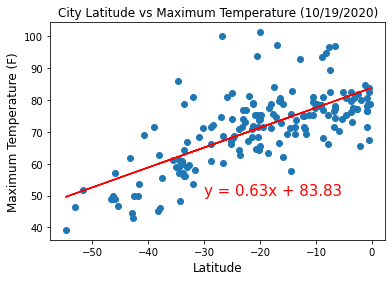

In [33]:
linear_regress(cleaned_city_df,'Max Temp','Southern')

# Observations for Maximum Temerature
There is a strong correlation between latitude and temperature for both Northern and Southern hemisperes.   It is a positive correctlation for the Southern hemisphere and a negative correlation for the Northern hemisphere.   Therefore as the latitude increases so do the temperature and as the latitude decreases so does the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Value between Latitude and Humidity is 0.36 for the Northern Hemisphere


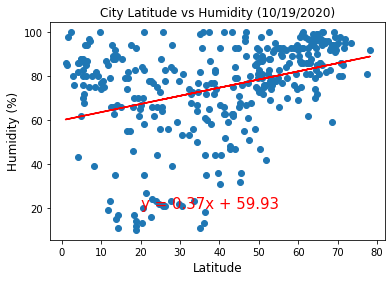

In [34]:
linear_regress(cleaned_city_df,'Humidity','Northern')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Value between Latitude and Humidity is 0.05 for the Southern Hemisphere


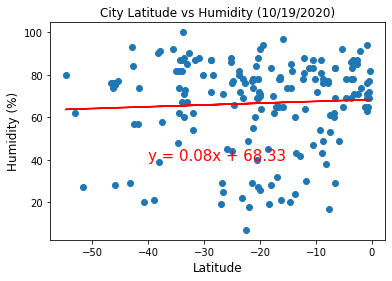

In [35]:
linear_regress(cleaned_city_df,'Humidity','Southern')

# Observaions for Humidity
There is a moderate correlation between latitude and Humitity for the Southern Hemisphere but the Norther Hemisphere has none or very week negative correclation.  So the latitude increases so does the humidity in the Northern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Value between Latitude and Cloudiness is 0.25 for the Northern Hemisphere


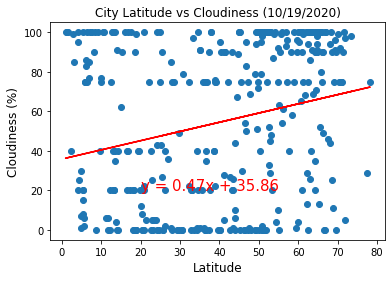

In [36]:
linear_regress(cleaned_city_df,'Cloudiness','Northern')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Value between Latitude and Cloudiness is 0.07 for the Southern Hemisphere


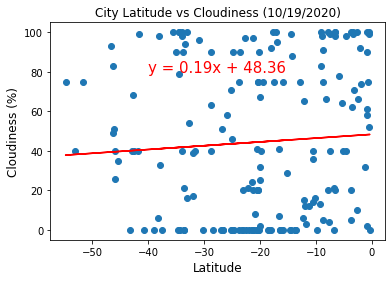

In [37]:
linear_regress(cleaned_city_df,'Cloudiness','Southern')

# Observaions for Cloudiness
The correlation for Cloudiness has None or very weak correlation for both the Northern and Southern hemispheres.   Therefore you can't use latitude to make any predictions for Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Value between Latitude and Wind Speed is 0.03 for the Northern Hemisphere


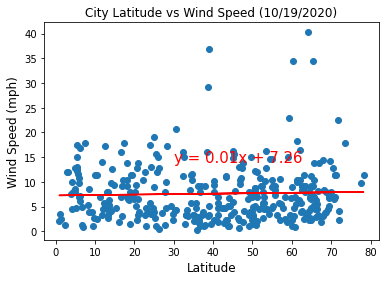

In [38]:
linear_regress(cleaned_city_df,'Wind Speed','Northern')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Value between Latitude and Wind Speed is -0.2 for the Southern Hemisphere


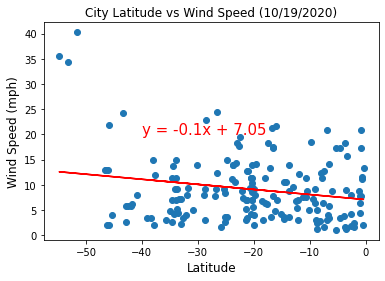

In [39]:
linear_regress(cleaned_city_df,'Wind Speed','Southern')

# Observaions for Wind Speed
The correlation for Wind Speed for both Northern and Southern hemisperes have "none or very weak correlation".   The Northern is postive and the Southern is negative.  There can't be any conculsion drawn for Wind Speed from Latitude.